# ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
res50 = ResNet50()
res50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [5]:
from tensorflow.keras.applications.resnet import ResNet101
res101 = ResNet101()

179658752/179648224 [==============================] - 2s 0us/step


In [6]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving dog1.jpg to dog1.jpg


In [11]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE)//w
    else:
        width, height = (w * IMAGE_SIZE)//h, IMAGE_SIZE
    new_img = np.array(img.resize((width, height)))
    diff = abs(width - height)//2     
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :] 
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

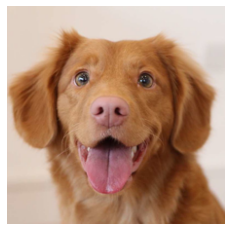

In [12]:
import matplotlib.pyplot as plt

img = Image.open('dog1.jpg').resize((224,224))
img2 = center_image(img)
plt.imshow(img2), plt.axis('off');

### 이미지 예측

In [16]:
# predict() : 여러 건의 데이터 입력 必
yhat = res50.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label 

((1, 1000),
 [[('n02099267', 'flat-coated_retriever', 0.7748733),
   ('n02104029', 'kuvasz', 0.05762355),
   ('n02099712', 'Labrador_retriever', 0.047069605),
   ('n02099601', 'golden_retriever', 0.039563578),
   ('n02099849', 'Chesapeake_Bay_retriever', 0.017182743)]])

In [17]:
label[0][0][1], label[0][0][2]

('flat-coated_retriever', 0.7748733)

In [18]:
yhat = res101.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label 

((1, 1000),
 [[('n02099267', 'flat-coated_retriever', 0.7344327),
   ('n04409515', 'tennis_ball', 0.060649145),
   ('n02099712', 'Labrador_retriever', 0.0428061),
   ('n02099601', 'golden_retriever', 0.028817726),
   ('n02099849', 'Chesapeake_Bay_retriever', 0.024560995)]])

In [19]:
label[0][0][1], label[0][0][2]

('flat-coated_retriever', 0.7344327)